# **6.8701 | 6.8710 | HST.507**

#**Fall 2022 Problem Set 3: Motifs and RNA Structures**

Due: Friday, October 28 at 11:59PM (submit copy of notebook to Canvas)

#Load libraries


In [ ]:
!pip install logomaker
from google.colab import files
from IPython.display import Image, display
import logomaker, math, random, string, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.1 MB/s 


# Gibbs sampling for motif discovery

In this problem, you will implement a Gibbs sampler to discover sequence motifs.

A) Recall the Gibbs sampling algorithm for this problem: Initialize the motif position in each sequence. Until convergence: re-estimate the position weight matrix (PWM) from all the motifs except one, score every position in the excluded sequence, and sample a $k$-mer from the excluded sequence with probability proportional to the score.

We have intentionally not specified many of the implementation details. Describe and justify the design decisions you made in your implementation. For example, how do you choose the sequence to exclude when recomputing the position weight matrix?

In [ ]:
alphabet = ['A', 'C', 'G', 'T']

### GibbsSampler:
### INPUTS:	S - list of sequences
###		    L - length of motif
###	OUTPUT:	PWM - 4 x L list with frequencies of each base at each position
###               Order of bases should be consistent with alphabet variable
def GibbsSampler(S, L):
    PWM = [[0 for _ in range(L)] for _ in range(len(alphabet))]

    ### YOUR CODE HERE ###
    #Generating kmers from each sequences at random indexes 
    kmers=[]
    for seq in S:
      seq_index=np.random.randint(0,len(seq)-L)
      kmers.append(seq[seq_index:seq_index+L])
    
    
    for h in range(10000): #running X times for convergences 
      hidden_kmer_index=np.random.randint(0,len(kmers)) #picking a kmer to hide 
      kmers.pop(hidden_kmer_index)
      kmers_PWM=kmers[:] #rest of the kemers for calculating PWM
    
    #calculating PWM
      for i in range(L):
        for seq in kmers_PWM:
          if seq[i]=='A': 
            PWM[0][i]+=1
          elif seq[i]=='C':
            PWM[1][i]+=1
          elif seq[i]=='G':
            PWM[2][i]+=1
          elif seq[i]=='T':
            PWM[3][i]+=1
        total=PWM[0][i]+PWM[1][i]+PWM[2][i]+PWM[3][i]
        for l in range(len(alphabet)):
          PWM[l][i]=PWM[l][i]/total

      #generating all the kmers from hidden sequences 
      kmers_hidden_seq=[]
      hidden_seq=S[hidden_kmer_index][:]
      for kmer_index in range(len(hidden_seq)-L):
        kmers_hidden_seq.append(hidden_seq[kmer_index:kmer_index+L])

      # calculating the probabilities for each kmers from hidden sequence using PWM
      kmers_hidden_seq_p=[]
      for hidden_kmer in kmers_hidden_seq:
        prob_hidden_kmer=1
        for j in range(len(hidden_kmer)):
          if hidden_kmer[j]=='A':
            prob_hidden_kmer*=PWM[0][j]
          elif hidden_kmer[j]=='C':
            prob_hidden_kmer*=PWM[1][j]
          elif hidden_kmer[j]=='G':
            prob_hidden_kmer*=PWM[2][j]
          elif hidden_kmer=='T':
            prob_hidden_kmer*=PWM[3][j]
        kmers_hidden_seq_p.append(prob_hidden_kmer)
      
      #picking the kmers from hidden sequence based on their probabilities 
      normalized_prob=[float(i)/sum(kmers_hidden_seq_p) for i in kmers_hidden_seq_p]
      prob_picked_index=np.random.choice([i for i in range(len(kmers_hidden_seq_p))],p=normalized_prob)

      #Inserting the kmer from hidden sequence to original list of kmers at its sister kmer position 
      kmers.insert(hidden_kmer_index,kmers_hidden_seq[prob_picked_index])
       
    return PWM

### ADD FUNCTIONS HERE ###

###########################
# NO NEED TO MODIFY BELOW #
###########################

def get_motif_seq(PWM):
    motif_seq = ""
    for i in range(len(PWM[0])):
        comp = [row[i] for row in PWM]
        ind = max(range(len(comp)), key = comp.__getitem__)
        motif_seq += alphabet[ind]
    return motif_seq

def print_PWM(PWM, L):
    PWM_comp = []
    PWM_comp.append("||" + "|".join([str(i) for i in range(1, L + 1)]) + "|")
    PWM_comp.append("|-" * (L + 1) + "|")
    for i in range(4):
        PWM_comp.append("|" + alphabet[i] + "|" + "|".join([str(round(val, 2)) for val in PWM[i]]) + "|")
    print("\n".join(PWM_comp) + "\n")

def print_logo(PWM):
    PWM = np.array(PWM).T
    PWM = pd.DataFrame(PWM, columns = alphabet)
    logomaker.Logo(PWM, fade_below = 0.8)

def run_GibbsSampler(S, L, n):
    motif_seqs, motif_PWM = {}, {}
    for i in range(n):
        PWM = GibbsSampler(S, L)
        motif_seq = get_motif_seq(PWM)
        motif_seqs.setdefault(motif_seq, 0)
        motif_seqs[motif_seq] += 1
        motif_PWM[motif_seq] = PWM
    best_motif = max(motif_seqs.keys(), key = lambda x: motif_seqs[x])
    print("Most consistent motif: \n" + best_motif + "\n")
    print("PWM (paste into text block):")
    print_PWM(motif_PWM[best_motif], L)
    print("Sequence logo:")
    print_logo(motif_PWM[best_motif])

**Answer here:**

You will need to download the following [files](https://www.dropbox.com/sh/ymt4j1cjvn1xdrj/AAA3tKLQdkDPFoAYOA9kdmwUa?dl=0) and upload them to colab using the following code block.

In [ ]:
gibbs_motifs = files.upload()
for k, v in gibbs_motifs.items():
    gibbs_motifs[k] = v.decode("utf-8-sig").split()

Saving data1.txt to data1.txt
Saving data2.txt to data2.txt
Saving data3.txt to data3.txt
Saving data4.txt to data4.txt


B) We have provided four test cases. `data1` is a synthetic data set where
the motif is identical across the sequences. `data2` is a synthetic data set
with a degenerate motif. `data3` and `data4` are yeast transcription factor
binding sites of ACE2 and MBP1, respectively.

Run your Gibbs sampler on the test data to discover motifs of length 10. You will need to repeat this procedure several times on each data set due to the stochastic nature of Gibbs sampling.

Report the most consistently found PWM for each sequence.

Most consistent motif: 
TATTCGAATT

PWM (paste into text block):
||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|0.0|1.0|0.0|0.0|0.0|0.0|1.0|1.0|0.0|0.0|
|C|0.44|0.0|0.0|0.0|1.0|0.0|0.0|0.0|0.0|0.0|
|G|0.0|0.0|0.0|0.0|0.0|1.0|0.0|0.0|0.0|0.0|
|T|0.56|0.0|1.0|1.0|0.0|0.0|0.0|0.0|1.0|1.0|

Sequence logo:


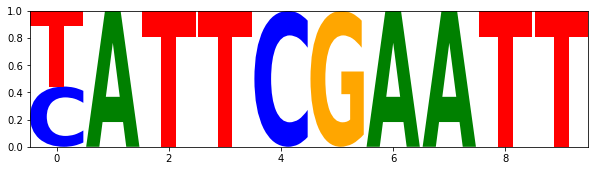

In [ ]:
run_GibbsSampler(gibbs_motifs["data1.txt"], 10, 1)

**Answer here:**

`data1` PWM:

Most consistent motif: 
TATTCGAATT

||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|0.0|1.0|0.0|0.0|0.0|0.0|1.0|1.0|0.0|0.0|
|C|0.44|0.0|0.0|0.0|1.0|0.0|0.0|0.0|0.0|0.0|
|G|0.0|0.0|0.0|0.0|0.0|1.0|0.0|0.0|0.0|0.0|
|T|0.56|0.0|1.0|1.0|0.0|0.0|0.0|0.0|1.0|1.0|

`data2` PWM:

Most consistent motif: 
TTCCCATCTG


||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|0.34|0.46|0.22|0.0|0.0|0.88|0.11|0.0|0.0|0.0|
|C|0.0|0.0|0.43|0.56|0.67|0.0|0.0|0.68|0.0|0.0|
|G|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.11|0.88|
|T|0.66|0.54|0.34|0.44|0.33|0.12|0.89|0.32|0.89|0.12|


`data3` PWM:

Most consistent motif: 
TTTTTTTTTT

||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|0.0|0.0|0.0|0.0|0.15|0.21|0.0|0.0|0.0|0.09|
|C|0.0|0.0|0.3|0.33|0.18|0.3|0.06|0.18|0.0|0.12|
|G|0.0|0.24|0.0|0.06|0.0|0.0|0.0|0.0|0.0|0.0|
|T|1.0|0.76|0.7|0.61|0.67|0.48|0.94|0.82|1.0|0.79|

`data4` PWM:

Most consistent motif: 
TTTTTTTTTT

||1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|A|0.0|0.09|0.0|0.18|0.0|0.09|0.09|0.0|0.02|0.13|
|C|0.31|0.11|0.11|0.0|0.27|0.0|0.07|0.0|0.25|0.0|
|G|0.0|0.0|0.0|0.0|0.0|0.15|0.0|0.0|0.0|0.04|
|T|0.69|0.8|0.89|0.82|0.73|0.76|0.84|1.0|0.73|0.84|

You will need to download the following [files](https://www.dropbox.com/sh/tx0p18sx4daw50t/AAC5_T1bRboHw_Di7sjxgpuya?dl=0) and upload them to colab using the following code block.

In [ ]:
intergenic = files.upload()
for k, v in intergenic.items():
    intergenic[k] = v.decode("utf-8-sig")

In [ ]:
# Intergenic regions: intergenic["allinter"]
# Annotation of conservation: intergenic["allintercons"]

### YOUR CODE HERE ###

**Answer here:**

Most frequently occurring:

Most conserved:

**Answer here:**

# RNA secondary structure

In this problem we will explore the output of the Nussinov algorithm on random
RNA sequences.

A) Implement the Nussinov algorithm, scoring A-U, G-U, and C-G pairs as -1 and all other pairs as 0.

In [ ]:
				         #  A   U   C   G
scoring_matrix = [[ 0, -1,  0,  0], # A
									[-1,  0,  0, -1], # U
									[ 0,  0,  0, -1], # C
									[ 0, -1, -1,  0]] # G
b_map = {'A': 0, 'U': 1, 'C': 2, 'G': 3}

def nussinov(seq):
	### YOUR CODE HERE ###
	n=len(seq)
	N=np.zeros((n,n))
		
	for k in range(1,n):
		for j in range(k,n):
			i=j-k
			c1=N[i+1,j-1] + scoring_matrix[b_map[seq[i]]][b_map[seq[j]]] #taking a pair of bases 
			c2=N[i,j-1] #taking one base 
			c3=N[i+1,j] #taking one base 
			if i+3<=j:
				tem=[]
				for k in range(i+1,j):
					tem.append(N[i,k]+N[k+1,j]) 
				c4=min(tem)
				N[i,j]=min(c1,c2,c3,c4) 
			else:
				N[i,j]=min(c1,c2,c3)
		
	return N[0,n-1]

B) Generate 1000 RNA sequences of length 100 where each base is drawn
uniformly at random. What is the average score for these sequences?

***Answer***

-29.168

In [ ]:
def gen_seq(L):
    bases = ['A', 'U', 'C', 'G']
    return ''.join([random.choice(bases) for _ in range(L)])

def nussinov_avg(L, n):
    cum_score = 0
    for _ in range(n):
        cum_score += nussinov(gen_seq(L))
    return cum_score / n

In [ ]:
nussinov_avg(100, 1000)

-29.168

C) How does the score vary as a function of length? (You will need to repeat (B) for various lengths.)

In [ ]:
### YOUR CODE HERE ###
answeer=[] #contains tuple of (length, avg_score)
for n in range(1,8):
  print(n)
  avg_score=nussinov_avg(2**n,1000)
  answeer.append((2**n,avg_score))

print('(Lenght, Average Score)', answeer)


1
2
3
4
5
6
7
(Lenght, Average Score) [(2, -0.361), (4, -1.067), (8, -2.319), (16, -4.65), (32, -9.326), (64, -18.533), (128, -37.203)]


**Answer here:**
(Length, Average Score) : [(2, -0.361), (4, -1.067), (8, -2.319), (16, -4.65), (32, -9.326), (64, -18.533), (128, -37.203)]

D) How does the score vary as a function of GC content? Is this function symmetric around GC content equal to 0.5? Why or why not? (You will need to repeat (B) for different distributions from which you draw bases.)

**Answer**

Yes, the function is symmetric around GC content equal to 0.5 because probability of choosing either C or G is 2 out of 4. 

In [ ]:
def gen_seq(L,i):
    #L-sequence length
    #i-probaility of GC content 
    ### YOUR CODE HERE ###
    bases = ['A', 'U', 'C', 'G']
    return ''.join([np.random.choice(bases,p=[(1-i)/2,(1-i)/2, i/2, i/2]) for _ in range(L)])

def nussinov_avg(L, n,i):
    cum_score = 0
    for _ in range(n):
        cum_score += nussinov(gen_seq(L,i))
    return cum_score / n

In [ ]:
### YOUR CODE HERE ###
answer=[] # contains tuple (probability of CG, average score)
for i in range(1,10):
  j=i/10
  print(j) #track where the function is
  avg_score=nussinov_avg(100, 1000, j)
  answer.append((j,avg_score))



0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [ ]:
print('(CG content probability, avg_score) :', answer)

(CG content probability, avg_score) : [(0.1, -31.8), (0.2, -30.702), (0.3, -29.792), (0.4, -29.411), (0.5, -29.197), (0.6, -29.19), (0.7, -29.932), (0.8, -30.672), (0.9, -31.873)]


**Answer here:**

(CG content probability, avg_score):  [(0.1, -31.8), (0.2, -30.702), (0.3, -29.792), (0.4, -29.411), (0.5, -29.197), (0.6, -29.19), (0.7, -29.932), (0.8, -30.672), (0.9, -31.873)]

E) Given an RNA transcript of interest, how should you interpret the score output by the Nussinov algorithm with respect to your observations about its dependence on length and sequence composition? Is there a better way to estimate the effect of these biases on the score?

**Answer here:**

It seems the scores are higher( more matches) and hence more ways to arrange the secondary structure of RNA as the length of sequence increases. However, it seems probability of CG content does not affect the score for a given length of sequence. 

Intuitatively, biases on GC should increase score because more availability of GC would give more freedom to base pair. Perhaps probability of CG co-depends in the length. Perhaps measuring the effect of both length and CG probability might give further insight.  



# (6.8710 – Graduate Students only). +25 points for non-gradute students. Probabilistic model for transcription factor binding sites

In this problem we will derive the probabilistic model underlying position weight matrices (PWMs) and use it to study CCCTC-binding factor (CTCF) binding sites. CTCF is a conserved zinc-finger protein which binds to thousands of locations in the human genome and acts as an insulator/repressor.

A) Explain how to estimate the motif model $M = [m_{ij}]$ where $m_{ij} = P(position~i = nucleotide~j)$.

**Answer here:**

B) Describe and justify an algorithm to estimate the background model $B$. What assumptions does your model make? What are some of its weaknesses?

**Answer here:**

You will need to download the following [files](https://www.dropbox.com/sh/uqqqvlxe6udrc56/AACKMsRAFc6JxH8z0Qpg-YvGa?dl=0) and upload them (except `ctcf_motif.jpg`) to colab using the following code block.

In [ ]:
ctcf_data = files.upload()
for k, v in ctcf_data.items():
    ### YOUR CODE HERE ###

C) Recall that a PWM gives the log odds of observing a particular nucleotide at a particular position in the motif model against the background distribution.

Implement your algorithm from (A) to estimate $M$ from `ctcf_binding_site_sequences.txt` and your algorithm from (B) to estimate $B$ from `chr11_region.fa`. Then, estimate a PWM for CTCF using $M$ and $B$. Report all of the distributions.

In [ ]:
def estimate_model(""" YOUR PARAMETERS HERE """):

    ### YOUR CODE HERE ###

def estimate_background(""" YOUR PARAMETERS HERE """):

    ### YOUR CODE HERE ###

def estimate_pwm(""" YOUR PARAMETERS HERE """):

    ### YOUR CODE HERE ###

**Answer here:**

$M$:

$B$:

PWM:

D) An alternative visual representation of transcription factor binding sites is a sequence logo which gives the information content at every position (intuitively, how important each position is for protein binding affinity).

Use the `logomaker` (already imported) library to generate a sequence logo for `ctcf_binding_site_sequences.txt`. You may find these `logomaker` [tutorials](https://github.com/jbkinney/logomaker/tree/master/logomaker/tutorials) to be useful.

In [ ]:
### YOUR CODE HERE ###

E) Compare your sequence logo to the published logo `ctcf_motif.jpg`. What could account for any differences?

**Answer here:**

F) Discuss the limitations of PWMs as a representation of transcription factor binding sites. What assumptions are made? Do they hold in general?

**Answer here:**

G) Because the entries of a PWM are log odds scores, we can score a $k$-mer by simply adding up the appropriate entries of the PWM.

Convert the published Position Frequency Matrix (PFM) `ctcf_pfm.txt` to a PWM and use it to scan for CTCF binding sites in `chr11_region.fa`.

This region flanks the gene insulin-like growth factor 2 (*IGF2*). Plot the scores at every position for each strand. You may find the `matplotlib.pyplot` package (already imported) to be useful.

In [ ]:
### YOUR CODE HERE ###

H) Recall that short $k$-mers frequently occur by chance throughout the genome. Estimate the probability distribution of scores by randomly sampling 1 million  20-mers from chromosome 11 and scoring them using your PWM from (G). You may want to use the [full sequence](ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/chromosomes/chr11.fa.gz) of chromosome 11 rather than the region we have provided. Plot a histogram of this distribution. Again, you may find the `matplotlib.pyplot` package (already imported) to be useful.

A simple way to use this null distribution to filter out hits that occurred by chance is to only keep hits with $P(score > threshold) < 10^{-5}$. Based on the distribution you estimated, what is the threshold?

Report the location, score, and sequence (be sure to
account for strand orientation) of each 20-mer which meets the threshold in a table.

In [ ]:
### YOUR CODE HERE ###

**Answer here:**

|Start|End|Score|Sequence|
|-|-|-|-|

I) Discuss some limitations of filtering PWM matches in this manner. Does the method by which we sample 20-mers matter? How will the sequence properties of randomly chosen genomic regions affect the answer? Can we choose regions in a more principled way to account for sequence properties? Is it possible to estimate the probability of a PWM match occurring by chance without sampling?

**Answer here:**